#### Atividade1 : Implementando um Perceptron

Discente: Luiz Henrique Pereira Niero
Docente: Prof. Dr. LucasC. Ribas
PPGCC - Unesp - 2025
Disciplina: Rdes Neurais Artificiais

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__ (self, x_train, y_train, tx_aprendizado, num_epocas):
        self.x_train = x_train
        self.y_train = y_train
        self.tx_aprendizagem = tx_aprendizado
        self.qtde_epocas = num_epocas
        
        self.quantidade_elementos_treino = x_train.shape[0]
        self.quantidade_atributos = x_train.shape[1] 
        self.w = np.random.uniform(0, 0.2, size=self.quantidade_atributos)
        self.limiar = random.uniform(0, 0.2) # ponto flutuante entre 0 e 0.2
        self.erros = 0
        self.w_epocas = []
        self.bias_epocas = []
        self.erros_epocas = []


    # Ajusta os pesos para uma linha da matriz de entrada (aqui uma linha corresponde a um elemento x do conjunto X de treinamento)
    # Retorna 1 se a predição foi correta e 0 se a predição foi errada
    def treina_elemento(self, indice):
        gux = 0
        wx = 0
        y = self.y_train[indice]
    
        # Itera por cada elemento i de xi e wi e faz a soma em wx.
        for i in range(self.quantidade_atributos):
            wxi = self.x_train[indice][i] * self.w[i]
            wx += wxi
    
        wx = wx + self.limiar
        
        if wx >= 0:
            gux = 1
        else:
            gux = -1
    
        if y == gux:
            return 1
        else:
            diferenca = y - gux
            ajuste_base = self.tx_aprendizagem * diferenca

            # Ajusta cada elemento do vetor W
            for j in range (self.quantidade_atributos):
                self.w[j] = self.w[j] + ajuste_base * self.x_train[indice][j]
            
            # Ajusta o bias
            self.limiar = self.limiar + ajuste_base
            return 0


    def treina_epoca(self, epoca):
        acertos_da_epoca = 0
        erros_da_epoca = 0
        
        for i in range(self.quantidade_elementos_treino):
            acertos_da_epoca += self.treina_elemento(i)

        # salvando os pesos da época.
        self.w_epocas.append(self.w.copy())
        self.bias_epocas.append(self.limiar.copy())
        erros_da_epoca = self.quantidade_elementos_treino - acertos_da_epoca
        self.erros_epocas.append(erros_da_epoca)
        
        self.erros = erros_da_epoca
        #print(f"Época {epoca}. Acertos: {acertos_da_epoca} Erros: {erros_da_epoca}. Taxa de acertos: {acertos_da_epoca / self.quantidade_elementos_treino}")          


    def treina(self):
        for epoca in range(self.qtde_epocas):
            self.treina_epoca(epoca)

        print("\r\n --- Resultados do treinamento --- ")
        melhor_epoca =  self.erros_epocas.index(min(self.erros_epocas))
        melhor_w = self.w_epocas[melhor_epoca]
        melhor_bias = self.bias_epocas[melhor_epoca]
        erros_melhor_epoca = self.erros_epocas[melhor_epoca]
        tx_acerto_melhor_epoca = (self.quantidade_elementos_treino - erros_melhor_epoca) / self.quantidade_elementos_treino
        
        print(f"Melhor época: {melhor_epoca}")
        print(f"Quantidade de erros: {erros_melhor_epoca}")        
        print(f"Taxa de acertos da melhor época: {tx_acerto_melhor_epoca}")
        print(f"Melhores pesos: {melhor_w}")
        print(f"Melhor bias: {melhor_bias}")

        epocas = range(1, len(self.erros_epocas) + 1)
        tx_erros = [(erro / len(self.erros_epocas)) for erro in self.erros_epocas]
        
        plt.plot(epocas, tx_erros, marker='o', linestyle='-')
        plt.xlabel('Épocas')
        plt.ylabel('% erro')
        plt.title('Erro ao longo das Épocas de Treinamento')
        plt.grid(True)
        plt.show()


    def testa(self, x_test, y_test):
        melhor_epoca =  self.erros_epocas.index(min(self.erros_epocas))
        
        w = self.w_epocas[melhor_epoca]
        b = self.bias_epocas[melhor_epoca]
        
        quantidade_elementos_teste = x_test.shape[0]
        acertos = 0
        
        for i in range (quantidade_elementos_teste):
            xw = 0 #Somatória wixi + bias com i = 0:n.
            y = y_test[i] # Valor esperado
            
            # Soma cada atributo * peso do elemento
            for j in range (self.quantidade_atributos):
                # xwj = xj * wj
                xwj = x_test[i][j] * w[j]
                xw += xwj
            xw += b

            # Função degrau g(xw)
            if (xw >= 0):
                gxw = 1
            else:
                gxw = -1


            # Verifica se acertou ou errou a predição do elemento i
            if gxw == y:
                acertos += 1

        print("Resultados dos testes : ")
        print(f"Total de elementos: {quantidade_elementos_teste}")
        print(f"Total de predições corretas: {acertos}")
        print(f"Taxa de acertos: {acertos / quantidade_elementos_teste}")
    

    def plota_grafico(self, X, Y, titulo):
        melhor_epoca = self.erros_epocas.index(min(self.erros_epocas))
        w = self.w_epocas[melhor_epoca]
        b = self.bias_epocas[melhor_epoca]
    
        # Definindo um intervalo para x1 baseado nos dados
        x1_min = X[:, 0].min() - 1
        x1_max = X[:, 0].max() + 1

        # dimensões x1 e x2 da linha
        linha_x1 = np.linspace(x1_min, x1_max, 100)
        linha_x2 = -(w[0] * linha_x1 + b) / w[1]
        
        # Separando os pontos por classe para melhor visualização
        X_pos = X[Y == 1]
        X_neg = X[Y == -1]
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', label='Classe 1')
        plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Classe -1')
        
        # Plotando a reta de decisão
        plt.plot(linha_x1, linha_x2, 'k-', label='Reta de decisão')
        
        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.title(f'Elementos e reta de Separação do Perceptron - {titulo}')
        plt.legend()
        plt.grid(True)
        plt.show()

#### Instancia e treina o Perceptron


 --- Resultados do treinamento --- 
Melhor época: 7
Quantidade de erros: 3
Taxa de acertos da melhor época: 0.9785714285714285
Melhores pesos: [-1.18006646  1.03357534]
Melhor bias: 0.6210278711504285


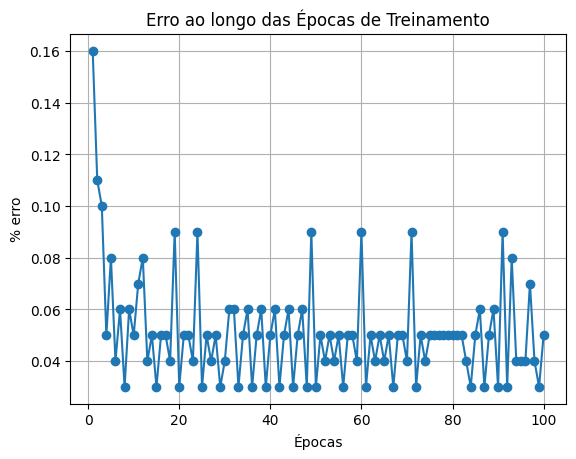

In [3]:
dataset_treinamento = 'perceptron_datasets\\train_dataset1.csv'
dataset_testes = 'perceptron_datasets\\test_dataset1.csv'

df_train_loaded = pd.read_csv(dataset_treinamento)
df_test_loaded = pd.read_csv(dataset_testes)

x_train = df_train_loaded.drop('label', axis=1).values
y_train = df_train_loaded['label'].values

x_test = df_test_loaded.drop('label', axis=1).values
y_test = df_test_loaded['label'].values

tx_aprendizado = 0.1
num_epocas = 100


# Recebe um vetor X e o valor previsto Y e atualiza os parâmetros W e Bias.
perceptron1 = Perceptron(x_train, y_train, tx_aprendizado, num_epocas)
perceptron1.treina()

#### Testa o perceptron treinado contra o conjunto de testes

Resultados dos testes : 
Total de elementos: 60
Total de predições corretas: 57
Taxa de acertos: 0.95


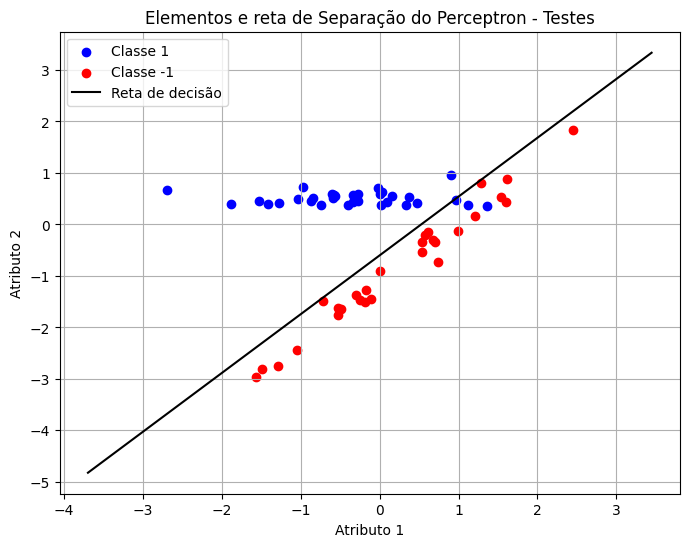

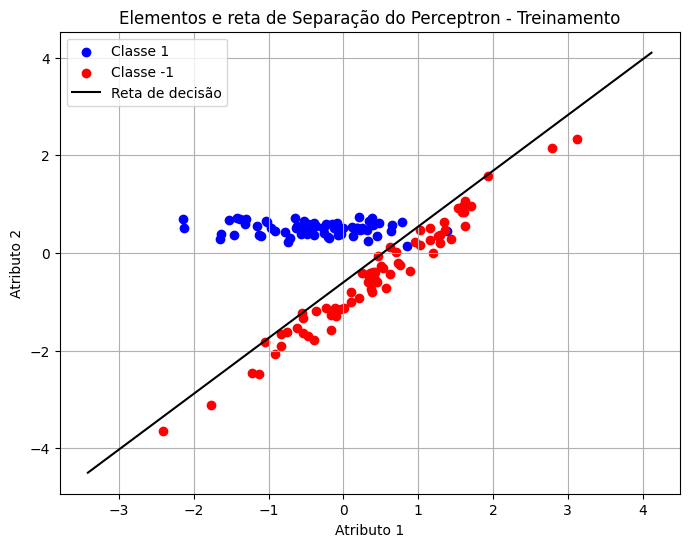

In [4]:
perceptron1.testa(x_test, y_test)
perceptron1.plota_grafico(x_test, y_test, 'Testes')
perceptron1.plota_grafico(x_train, y_train, 'Treinamento')


 --- Resultados do treinamento --- 
Melhor época: 3
Quantidade de erros: 84
Taxa de acertos da melhor época: 0.52
Melhores pesos: [ 0.12319198 -0.0159673 ]
Melhor bias: 0.18156008270208057


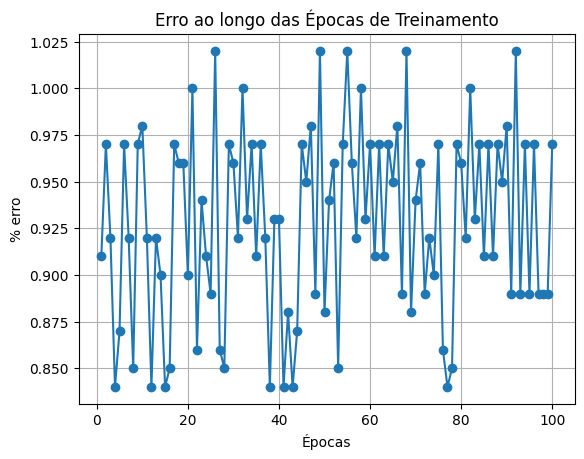

In [7]:
dataset_treinamento_2 = 'perceptron_datasets\\train_dataset2.csv'
dataset_testes_2 = 'perceptron_datasets\\test_dataset2.csv'

df_train_loaded_2 = pd.read_csv(dataset_treinamento_2)
df_test_loaded_2 = pd.read_csv(dataset_testes_2)

x_train_2 = df_train_loaded_2.drop('label', axis=1).values
y_train_2 = df_train_loaded_2['label'].values

x_test_2 = df_test_loaded_2.drop('label', axis=1).values
y_test_2 = df_test_loaded_2['label'].values

tx_aprendizado = 0.1
num_epocas = 100

# Recebe um vetor X e o valor previsto Y e atualiza os parâmetros W e Bias.
perceptron2 = Perceptron(x_train_2, y_train_2, tx_aprendizado, num_epocas)
perceptron2.treina()

Resultados dos testes : 
Total de elementos: 75
Total de predições corretas: 37
Taxa de acertos: 0.49333333333333335


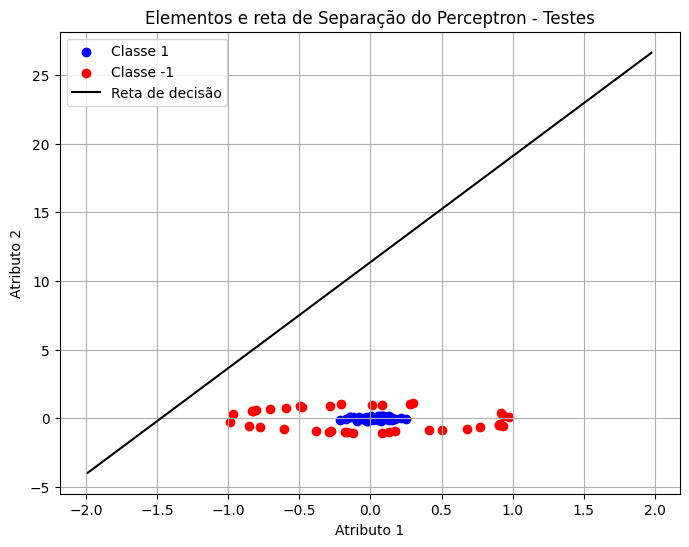

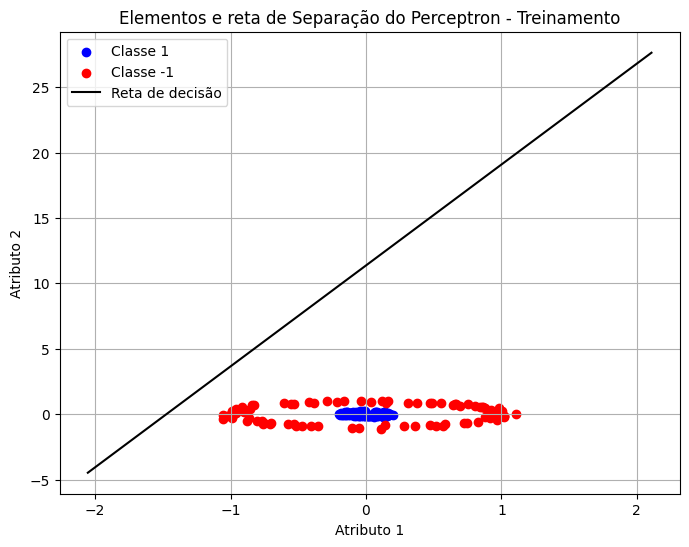

In [8]:
perceptron2.testa(x_test_2, y_test_2)
perceptron2.plota_grafico(x_test_2, y_test_2, 'Testes')
perceptron2.plota_grafico(x_train_2, y_train_2, 'Treinamento')


 --- Resultados do treinamento --- 
Melhor época: 116
Quantidade de erros: 9
Taxa de acertos da melhor época: 0.9387755102040817
Melhores pesos: [ 0.00019206  0.01359141 -0.00141874 -0.00357696  0.0050046  -0.01022421
  0.03091646  0.04534894 -0.02113674  0.12005075]
Melhor bias: -0.018005353747642346


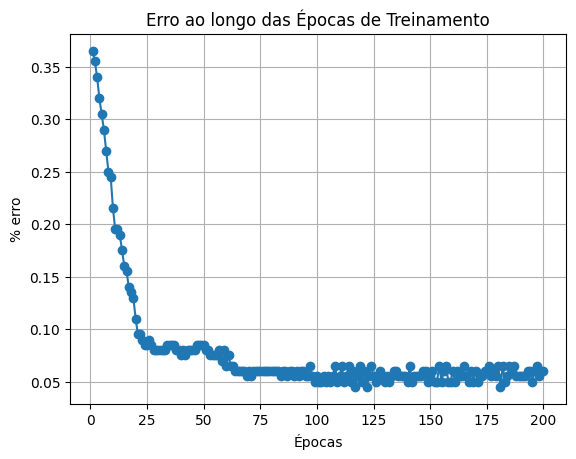

In [25]:
dataset_treinamento_3 = 'perceptron_datasets\\train_dataset3.csv'
dataset_testes_3 = 'perceptron_datasets\\test_dataset3.csv'

df_train_loaded_3 = pd.read_csv(dataset_treinamento_3)
df_test_loaded_3 = pd.read_csv(dataset_testes_3)

x_train_3 = df_train_loaded_3.drop('label', axis=1).values
y_train_3 = df_train_loaded_3['label'].values

x_test_3 = df_test_loaded_3.drop('label', axis=1).values
y_test_3 = df_test_loaded_3['label'].values

tx_aprendizado = 0.0001
num_epocas = 200

# Recebe um vetor X e o valor previsto Y e atualiza os parâmetros W e Bias.
perceptron3 = Perceptron(x_train_3, y_train_3, tx_aprendizado, num_epocas)
perceptron3.treina()

In [26]:
perceptron3.testa(x_test_3, y_test_3)

Resultados dos testes : 
Total de elementos: 63
Total de predições corretas: 52
Taxa de acertos: 0.8253968253968254
